# ZOMATO DATA ANALYSIS PROJECT

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Zomato.csv")
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


### Convert the data type of coloumn rate

In [21]:
def handleRate(value):
    value=str(value).split("/")
    value=value[0];
    return float(value)

df["rate"]=df["rate"].apply(handleRate)

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Q)Type of restaurant

In [49]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


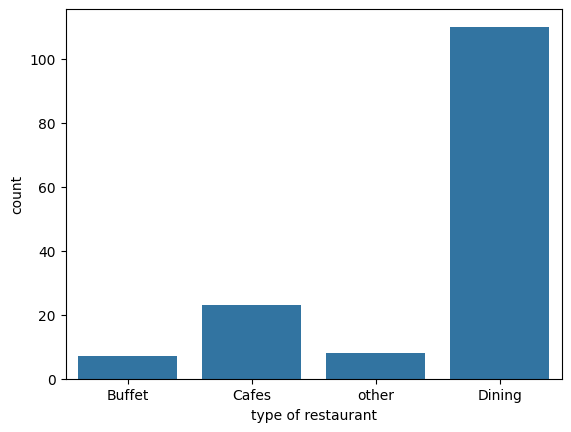

In [26]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("type of restaurant")
plt.show()

#### Conclusion--Majority of the restaurant falls in dining category

## Q)How many votes of each type of restaurant recieved from customers?

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


Text(0, 0.5, 'votes')

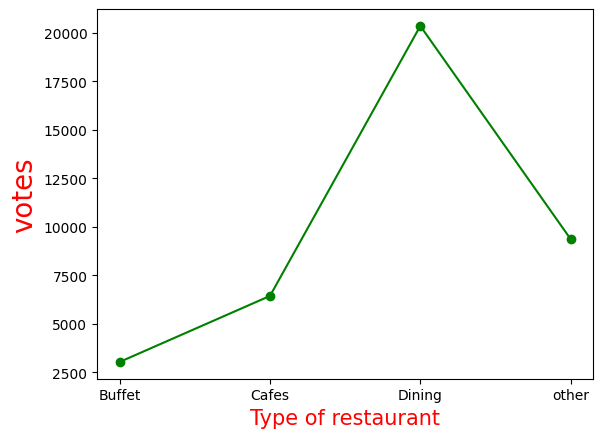

In [41]:
gp=df.groupby("listed_in(type)")["votes"].sum()
print(gp)
result=pd.DataFrame({"votes":gp})
plt.plot(result,color="green",marker="o")
plt.xlabel("Type of restaurant",color="red",size=15)
plt.ylabel("votes",color="red",size=20)

#### Conclusion--Dinning Restaurant has recieved maximum votes

## Q)What are the ratings that the majority of restaurants has received?

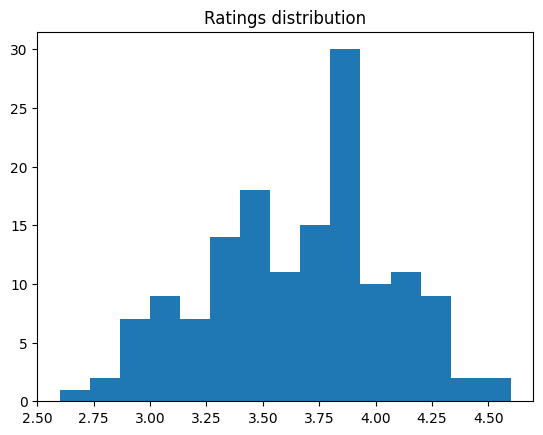

In [50]:
plt.hist(df["rate"],bins=15)
plt.title("Ratings distribution")
plt.show()

#### Conclusion--The majority restaurant received the ratings from 3.5 to 4

## Q)what is the average spending of two people(couple)

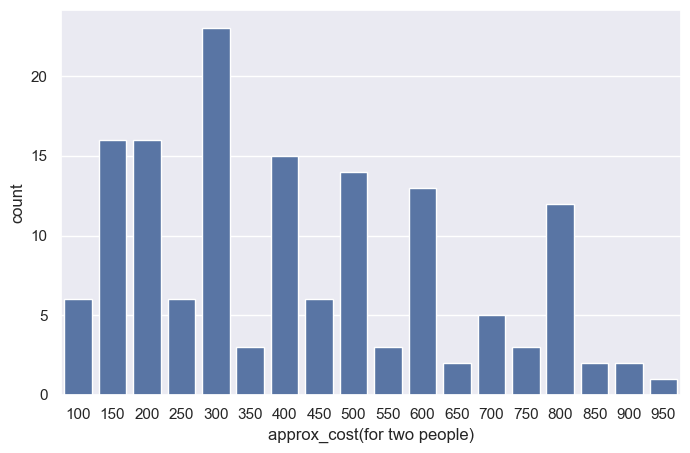

In [58]:
sns.set(rc={"figure.figsize":(8,5)})
coupleData=df['approx_cost(for two people)']
sns.countplot(x=coupleData)
plt.show()

#### Conclusion--The majority of couples prefer restaurants with an approximate cost of 300 rupees.

## Q)Which mode(online or offline) has recieved  the maximum rating?

online_order
No     4.3
Yes    4.6
Name: rate, dtype: float64


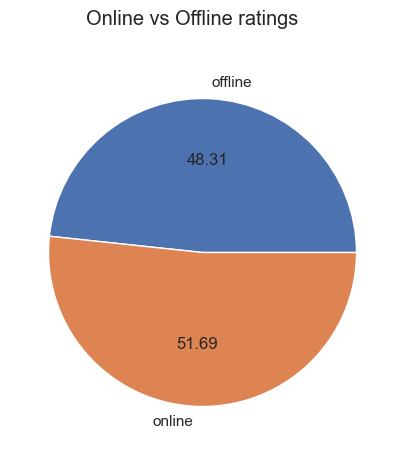

In [76]:
gp=df.groupby("online_order")["rate"].max()
print(gp)
order=["offline","online"]
plt.pie(gp.values,labels=order,autopct="%.2f")
plt.suptitle("Online vs Offline ratings")
plt.show()

#### Offline orders received lower ratings in comparison to online orders

## Q)Which type of restaurant received more offline orders,so that Zomato can provide customers with some good offers?

In [77]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


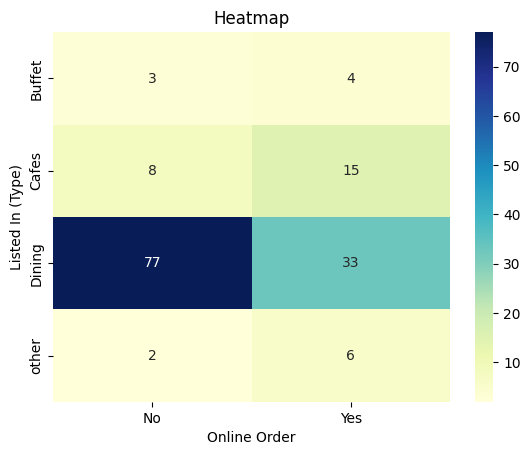

In [5]:
pivot_table = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


#### Conclusion--Dining restaurants primarily accept offline orders,whereas cafes primarily recieve online orders.This suggests that clients preferred orders in person at restaurant,but prefer online ordering at cafes.